In [257]:
# %cd /Users/garrettflowers/Documents/01 Education/MS Data Science/CSCI 5502/05 Project

/Users/garrettflowers/Documents/01 Education/MS Data Science/CSCI 5502/05 Project


# CSCI 5502 Project Data Exploration

## Notes

This project aims to collect, interpret, and analyze climate data of varying timeframes to better understand our current climate change trajectory and to measure against the Intergovernmental Panel on Climate Change (IPCC) organization’s varying climate change scenarios.

The IPCC has issued two different scenario concepts: the Representative Concentration Pathway (RCP) and the Shared Socioeconomic Pathway (SSP). The RCP, originally issued in 2014, provides 4 pathways that outline different predicted greenhouse gas concentrations (CO2-equivalent ppm) from 2000 to 2100. As of 2021, the IPCC released five new climate change scenarios that aim to project socioeconomic global changes and their resulting CO2 concentrations from 2000 to 2100.

This project is a new development within our team and will be built from the ground-up. While other climate simulation datasets exist, the team would like to maintain some level of independent analysis as we work through.

The project would begin by taking data from multiple sources (including historical climate data and existing climate simulation ensembles), and to incorporate that with live-data feeds from the NWS and NOAA to better understand how we are performing against the various climate change scenarios. Our team would be able to take the data and assess how realistic or attainable the various scenarios are, and calculate a score based on comparison to this benchmark. By utilizing live-data feeds from NWS/NOAA, the team would also be able to refresh the analysis on-demand based on nearer-term observations in precipitation, air pressure, temperature, and moisture.

Our team will evaluate results against the IPCC’s different climate scenarios. Time permitting, we can build in flexibility to modify those climate scenarios or create the ability to measure against newer scenarios as the IPCC releases them.

## Acronyms  

RCP - Representative Concentration Pathway is a greenhouse concentration trajectory.  

SSP - Shared Socioeconomic Pathways is a greenhouse emissions trajectory, which has further implications for climate change policy.  

IPCC - Intergovernmental Panel on Climate Change

IAM - Integrated Assessment Model

GML - Global Monitoring Laboratory

## Citations

- _Applying the global RCP–SSP–SPA scenario framework at sub-national scale: A multi-scale and participatory scenario approach_
    - https://www.sciencedirect.com/science/article/pii/S0048969718311276
    - could be useful to see how the authors apply this at a country level

- https://www.gml.noaa.gov/dv/data/index.php?category=Greenhouse%2BGases  
- https://iopscience.iop.org/article/10.1088/1748-9326/abe5d8

## Data Sources  

- Global Monitoring Laboratory
    - Earth systems observation data and averages
    - https://www.gml.noaa.gov/dv/data/index.php?category=Greenhouse%2BGases  
    - Methane, CO2, NO, Fluroinated gases all here
    - Flask, Insitu formats  

- RCP and SSP Benchmark
    - https://www.sciencedirect.com/science/article/pii/S0048969718311276

- Other Secondary Measurements to consider
    - sea level
    - precipitation
    - global avg temp
    - temp anomalies

- CMIP
    - https://en.wikipedia.org/wiki/Coupled_Model_Intercomparison_Project

- Groundwater in Colorado
    - First, gather as much historical info as we can on aquifers, wells, etc. in CO

- Iran Groundwater Study
    - They used:
        - Precipitation (P)
        - Temperature (T)
        - Groundwater Level (H)
        - and water withdrawal from resources (q)
        - Monthly



## Additional Information


Greenhouse gases and their CO2 equivalents

| Greenhouse gas    | CO2 equivalents |
|-------------------|-----------------|
| Water vapor       | 0               |
| Carbon Dioxide    | 1               |
| Methane           | 28              |
| Nitrous oxide     | 273             |
| Fluorinated gases | Up to 14,600    |  

IAMs

IPCC relies on process-based IAMs. There are also aggregate cost-benefit models that aim to calculate social cost of carbon.

> [From Wikipedia] All numerical models have shortcomings. Integrated Assessment Models for climate change, in particular, have been severely criticized for problematic assumptions that led to greatly overestimating the cost/benefit ratio for mitigating climate change while relying on economic models inappropriate to the problem.[41] In 2021, the integrated assessment modeling community examined gaps in what was termed the "possibility space" and how these might best be consolidated and addressed.[42] In an October 2021 working paper, Nicholas Stern argues that existing IAMs are inherently unable to capture the economic realities of the climate crisis under its current state of rapid progress.[43]: §6.2 

- 2023-11-26 we've shrunk our scope to examining/projecting groundwater levels for CO

# 1. Greenhouse Gases

## 1.1 Methane

In [2]:
import xarray as xr
import pandas as pd

# Load the NetCdf_drought_drought_drought file into an xarray Dataset
ds = xr.open_dataset('01 Data/ch4_crv_tower-insitu_1_ccgg_HourlyData.nc')
display(ds)

<xarray.Dataset>
Dimensions:                     (obs: 164048, calendar_components: 6,
                                 dim_concerns: 6)
Dimensions without coordinates: obs, calendar_components, dim_concerns
Data variables: (12/24)
    time                        (obs) datetime64[ns] ...
    start_time                  (obs) datetime64[ns] ...
    midpoint_time               (obs) datetime64[ns] ...
    datetime                    (obs) |S100 ...
    time_decimal                (obs) float64 ...
    time_components             (obs, calendar_components) float64 ...
    ...                          ...
    instrument                  (obs) |S100 ...
    obs_flag                    (obs) float64 ...
    assimilation_concerns       (obs, dim_concerns) int32 ...
    obspack_num                 (obs) int32 ...
    obspack_id                  (obs) |S200 ...
    unique_sample_location_num  (obs) int32 ...
Attributes: (12/100)
    site_code:                                 CRV
    site_name:                                 Carbon in Arctic Reservoirs Vu...
    site_country:                              United States
    site_country_flag:                         https://gml.noaa.gov/webdata/c...
    site_latitude:                             64.9863
    site_longitude:                            -147.598
    ...                                        ...
    partner_total_listed:                      1
    partner_1_name:                            Larry Ledlow
    partner_1_abbr:                            NOAA/NESDIS/OSPO
    partner_1_country:                         United States
    partner_1_parameter:                       Partner of measurements for: ch4
    partner_1_affiliation:                     NOAA NESDIS Office of Satellit...

Might need to learn how xarray works, otherwise hope a df works  
https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html

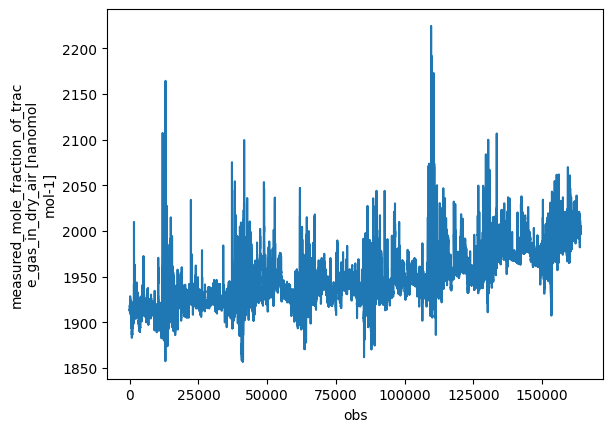

In [3]:
ds = ds.set_coords('time')
ds['value'].plot()

In [4]:
df = ds.to_dataframe()
ds.close()

In [5]:
df.describe()

time                     start_time  \
count                        5905728                        5905728   
mean   2018-06-05 15:54:33.878378240  2018-06-05 15:54:33.878378240   
min              2015-01-01 00:00:00            2015-01-01 00:00:00   
25%              2016-08-11 16:00:00            2016-08-11 16:00:00   
50%              2018-05-01 06:00:00            2018-05-01 06:00:00   
75%              2020-04-17 15:00:00            2020-04-17 15:00:00   
max              2021-12-31 16:00:00            2021-12-31 16:00:00   
std                              NaN                            NaN   

                       midpoint_time  time_decimal  time_components  \
count                        5905728  5.905728e+06     5.905728e+06   
mean   2018-06-05 16:24:33.878375936  2.018427e+03     3.419630e+02   
min              2015-01-01 00:30:00  2.015000e+03     0.000000e+00   
25%              2016-08-11 16:30:00  2.016611e+03     0.000000e+00   
50%              2018-05-01 06:30:00  2.018329e+03     7.000000e+00   
75%              2020-04-17 15:30:00  2.020294e+03     2.000000e+01   
max              2021-12-31 16:30:00  2.021999e+03     2.021000e+03   
std                              NaN  2.055037e+00     7.495511e+02   

       solartime_components         value     value_unc        nvalue  \
count          5.905728e+06  5.905728e+06  5.905728e+06  5.905728e+06   
mean           3.498160e+02  1.944677e+03  3.670773e+00  3.371818e+01   
min            0.000000e+00  1.856479e+03  3.100000e-01  1.000000e+00   
25%            7.000000e+00  1.923824e+03  3.520000e-01  5.000000e+00   
50%            1.500000e+01  1.940001e+03  4.470000e-01  5.000000e+00   
75%            3.700000e+01  1.964558e+03  6.730000e-01  9.200000e+01   
max            2.021000e+03  2.224399e+03  1.892876e+04  1.200000e+02   
std            7.461166e+02  2.899776e+01  7.167670e+01  4.058829e+01   

       value_std_dev  inst_repeatability      latitude     longitude  \
count   5.900724e+06        5.905728e+06  5.905728e+06  5.905728e+06   
mean    7.508528e-01        2.951188e+00  6.498574e+01 -1.475992e+02   
min     1.000000e-03        0.000000e+00  6.498630e+01 -1.475980e+02   
25%     3.740000e-01        2.300000e-02  6.498630e+01 -1.475980e+02   
50%     4.560000e-01        5.800000e-02  6.498630e+01 -1.475980e+02   
75%     5.780000e-01        1.730000e-01  6.498630e+01 -1.475980e+02   
max     8.080900e+01        9.999990e+02  6.498630e+01 -1.475980e+02   
std     1.478526e+00        4.224237e+01  0.000000e+00  0.000000e+00   

           altitude     elevation  intake_height      obs_flag  \
count  5.905728e+06  5.905728e+06   5.905728e+06  5.905728e+06   
mean   6.294512e+02  6.114351e+02   1.802133e+01  9.933922e-01   
min    6.163300e+02  6.114300e+02   4.900000e+00  0.000000e+00   
25%    6.163300e+02  6.114300e+02   4.900000e+00  1.000000e+00   
50%    6.285300e+02  6.114300e+02   1.710000e+01  1.000000e+00   
75%    6.431300e+02  6.114300e+02   3.170000e+01  1.000000e+00   
max    6.431300e+02  6.114300e+02   3.170000e+01  1.000000e+00   
std    1.100261e+01  0.000000e+00   1.100262e+01  8.101950e-02   

       assimilation_concerns   obspack_num  unique_sample_location_num  
count           5.905728e+06  5.905728e+06                5.905728e+06  
mean            1.101304e-03  3.312262e+06                1.254218e+07  
min             0.000000e+00  3.230239e+06                3.338355e+06  
25%             0.000000e+00  3.271251e+06                3.403551e+06  
50%             0.000000e+00  3.312262e+06                3.469122e+06  
75%             0.000000e+00  3.353274e+06                2.208122e+07  
max             1.000000e+00  3.394286e+06                4.864726e+07  
std             3.316762e-02  4.735658e+04                1.563256e+07

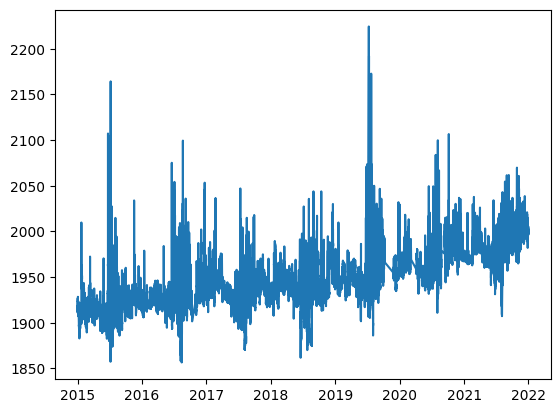

In [6]:
import matplotlib.pyplot as plt

plt.plot(df['time'], df['value'])

## 1.2. Carbon Dioxide
- https://www.gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/txt/co2_brw_surface-insitu_1_ccgg_MonthlyData.txt

In [20]:
url = 'http://www.gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/txt/co2_brw_surface-insitu_1_ccgg_MonthlyData.txt'

# pd.read_csv(url, sep='\t', header=None, skip_blank_lines=True)
import requests
import io

# s = requests.get(url).content
# io.StringIO(url)
c = pd.read_csv(url)

c


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)>

## 1.3. Nitrous Oxide

## 1.4. Fluorinated Gases 

# 2. Groundwater

## 2.1. Intro

https://stat5000-fall2023.slack.com/files/U05Q2BYKTFV/F0651LFGT29/ground_water_level_based_on_climate_change_and_validate_with_rcp.pdf

The USGS has an R package that can help us pull groundwater data.



In [258]:
%pip install rpy2 -q
%load_ext rpy2.ipython

Note: you may need to restart the kernel to use updated packages.
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## 2.2. Functions and Parameter Codes

| Function Name  | Data              |
|----------------|-------------------|
| readNWISuv     | Unit              |
| readNWISdv     | Daily             |
| **readNWISgwl**    | **Groundwater Level** |
| readNWISmeas   | Surface-water     |
| readNWISpeak   | Peak Flow         |
| readNWISqw     | Water Quality     |
| readNWISrating | Rating Curves     |
| readNWISuse    | Water Use         |
| readNWISstat   | Statistics        |

<br/>

| Parameter Codes |                Parameter Name                   |
|-----------------|-------------------------------------------------|
| **72019**           | **Depth to water level, ft below land surface, ft** |
| 62611           | Groundwater level above NAVD 1988, ft, ft       |
| 62610           | Groundwater level above NGVD 1929, ft           |

<br/>

More Info: https://waterdata.usgs.gov/blog/dataretrieval/

## 2.3. Citation

In [304]:
%%R
citation(package = "dataRetrieval")

To cite dataRetrieval in publications, please use:

  De Cicco, L.A., Hirsch, R.M., Lorenz, D., Watkins, W.D., Johnson, M.,
  2023, dataRetrieval: R packages for discovering and retrieving water
  data available from Federal hydrologic web services, v.2.7.13,
  doi:10.5066/P9X4L3GE

A BibTeX entry for LaTeX users is

  @Manual{,
    author = {Laura DeCicco and Robert Hirsch and David Lorenz and David Watkins and Mike Johnson},
    title = {dataRetrieval: R packages for discovering and retrieving water data available from U.S. federal hydrologic web services},
    publisher = {U.S. Geological Survey},
    address = {Reston, VA},
    version = {2.7.13},
    institution = {U.S. Geological Survey},
    year = {2023},
    doi = {10.5066/P9X4L3GE},
    url = {https://code.usgs.gov/water/dataRetrieval},
  }


## 2.4. Function Information

In [305]:
%%R
?readNWISgwl

File: /var/folders/cj/3zyd4jkj3s1f2bnvnnc629300000gn/T//Rtmp5zZBB3/Rtxta9fb5b96d7b3
readNWISgwl           package:dataRetrieval            R Documentation



Groundwater level measurements retrieval from USGS (NWIS)



Description:



     Reads groundwater level measurements from NWISweb. Mixed

     date/times come back from the service depending on the year that

     the data was collected. See

     <https://waterdata.usgs.gov/usa/nwis/gw> for details about

     groundwater. By default the returned dates are converted to date

     objects, unless convertType is specified as FALSE. Sites with

     non-standard date formats (i.e. lacking a day) can be affected

     (see examples). See

     <https://waterservices.usgs.gov/rest/GW-Levels-Service.html> for

     more information.



Usage:



     readNWISgwl(

       siteNumbers,

       startDate = "",

       endDate = "",

       parameterCd = NA,

       convertType = TRUE,

       tz = "UTC"

     )

     

Arguments:



sit

## 2.5. Colorado Groundwater Data Explore

In [274]:
%%R -o df -o site_info
# install.packages("dataRetrieval")
library(dataRetrieval)
# https://doi-usgs.github.io/dataRetrieval/

siteNumber <- c("393902103554001", "390740103055801", "382323104200701")  # Front range wells CO
ChoptankInfo <- readNWISsite(siteNumber)
parameterCd <- "72019"

# Raw daily data:
df <- readNWISgwl(
  siteNumber =siteNumber,
  parameterCd = parameterCd,
  startDate="", 
  endDate="2022-01-01",
  tz="America/Denver"
)

site_info <- attributes(df)$siteInfo

In [275]:
from function_store import generate_metadata

import pandas as pd

df = pd.merge(
    left=df,
    right=site_info[['site_no','station_nm']],
    on='site_no',
    how='left'
)

generate_metadata(df, display_df=True)

agency_cd          site_no site_tp_cd   lev_dt lev_tm lev_tz_cd_reported  \
0      USGS  382323104200701         GW   7939.0   None                UTC   
1      USGS  382323104200701         GW   9700.0   None                UTC   
2      USGS  382323104200701         GW   9853.0  16:40                UTC   
3      USGS  382323104200701         GW  10099.0  20:22                UTC   
4      USGS  382323104200701         GW  10406.0  16:20                UTC   

   lev_va  sl_lev_va sl_datum_cd lev_status_cd lev_agency_cd lev_dt_acy_cd  \
0   21.06        NaN        None             1          USGS             D   
1   20.52        NaN        None             1          USGS             D   
2   20.13        NaN        None             1          USGS             m   
3   20.61        NaN        None             1          USGS             m   
4   20.40        NaN        None             1          USGS             m   

  lev_acy_cd lev_src_cd lev_meth_cd lev_age_cd parameter_cd  \
0       None          S           T          A        72019   
1       None          S           T          A        72019   
2       None          S           T          A        72019   
3       None          S           T          A        72019   
4       None          S           T          A        72019   

               lev_dateTime       lev_tz_cd  \
0                       NaT  America/Denver   
1                       NaT  America/Denver   
2 1996-12-23 09:40:00-07:00  America/Denver   
3 1997-08-26 14:22:00-06:00  America/Denver   
4 1998-06-29 10:20:00-06:00  America/Denver   

                                    station_nm  
0  SC01906221AAA  DROUGHT WELL NEAR PUEBLO, CO  
1  SC01906221AAA  DROUGHT WELL NEAR PUEBLO, CO  
2  SC01906221AAA  DROUGHT WELL NEAR PUEBLO, CO  
3  SC01906221AAA  DROUGHT WELL NEAR PUEBLO, CO  
4  SC01906221AAA  DROUGHT WELL NEAR PUEBLO, CO

ColumnName                        DataType  MissingValues  \
0            agency_cd                          object              0   
1              site_no                          object              0   
2           site_tp_cd                          object              0   
3               lev_dt                         float64              0   
4               lev_tm                          object            100   
5   lev_tz_cd_reported                          object              0   
6               lev_va                         float64              0   
7            sl_lev_va                         float64            347   
8          sl_datum_cd                          object            347   
9        lev_status_cd                          object              0   
10       lev_agency_cd                          object             25   
11       lev_dt_acy_cd                          object              0   
12          lev_acy_cd                          object            347   
13          lev_src_cd                          object             25   
14         lev_meth_cd                          object              0   
15          lev_age_cd                          object              0   
16        parameter_cd                          object              0   
17        lev_dateTime  datetime64[ns, America/Denver]            100   
18           lev_tz_cd                          object              0   
19          station_nm                          object              0   

    NonMissingValues  UniqueValues  \
0                347             1   
1                347             3   
2                347             1   
3                347           305   
4                247           133   
5                347             1   
6                347           223   
7                  0             0   
8                  0             0   
9                347             1   
10               322             2   
11               347             2   
12                 0             0   
13               322             2   
14               347             5   
15               347             2   
16               347             1   
17               247           247   
18               347             1   
19               347             3   

                                     FirstValue  \
0                                          USGS   
1                               382323104200701   
2                                            GW   
3                                        7939.0   
4                                         16:40   
5                                           UTC   
6                                         21.06   
7                                          None   
8                                          None   
9                                             1   
10                                         USGS   
11                                            D   
12                                         None   
13                                            S   
14                                            T   
15                                            A   
16                                        72019   
17                    1996-12-23 09:40:00-07:00   
18                               America/Denver   
19  SC01906221AAA  DROUGHT WELL NEAR PUEBLO, CO   

                            LastValue  
0                                USGS  
1                     393902103554001  
2                                  GW  
3                             18969.0  
4                               20:32  
5                                 UTC  
6                               12.55  
7                                None  
8                                None  
9                                   1  
10                               USGS  
11                                  m  
12                               None  
13                                  S  
14     

In [290]:
%%R -o all_sites
library(dataRetrieval)
# what if we want more sites, or different states?

all_sites <- whatNWISsites(stateCd='08')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rpy2/robjects/vectors.py:1016: UserWarning:

R object inheriting from "POSIXct" but without attribute "tzone".



In [388]:
gw_sites = all_sites[all_sites['site_tp_cd'] == 'GW']
starred_sites = gw_sites[gw_sites['site_no'].isin(["393902103554001", "390740103055801", "382323104200701"])]

# Create a scatter map for all gw_sites
fig = px.scatter_mapbox(gw_sites, lat='dec_lat_va', lon='dec_long_va', 
                        color_discrete_sequence=["rgba(0,0,139,0.2)"], 
                        mapbox_style="open-street-map", 
                        hover_data=gw_sites.columns)

# Update layout
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show plot
fig.show()

In [378]:
starred_sites = gw_sites[gw_sites['site_no'].isin(["393902103554001", "390740103055801", "382323104200701"])]

agency_cd          site_no                                   station_nm  \
25036      USGS  382323104200701  SC01906221AAA  DROUGHT WELL NEAR PUEBLO, CO   
28308      USGS  390740103055801                  SC01105103BAA1 LKWD RT WELL   
38657      USGS  393902103554001            SC00505806BBD1 DTX10A MUDDY CREEK   

      site_tp_cd  dec_lat_va  dec_long_va  colocated  \
25036         GW   38.389672  -104.335817      False   
28308         GW   39.127771  -103.099936      False   
38657         GW   39.650556  -103.927778       True   

                             queryTime  
25036 2023-11-26 16:15:49.543904-07:00  
28308 2023-11-26 16:15:49.543904-07:00  
38657 2023-11-26 16:15:49.543904-07:00

In [313]:
# Attempting to get every site I can:

co_gw_sites_list = []
for site in gw_sites['site_no']:
    co_gw_sites_list.append(site)

In [324]:
%%R -i co_gw_sites_list -o df_all

library(dataRetrieval)
# https://doi-usgs.github.io/dataRetrieval/

siteNumber <- co_gw_sites_list # Front range wells CO
ChoptankInfo <- readNWISsite(siteNumber)
parameterCd <- "72019"

# Raw daily data:
df_all <- readNWISgwl(
  siteNumber = siteNumber,
  parameterCd = parameterCd,
  startDate="", 
  endDate="2022-01-01",
  tz="America/Denver"
)

Not all dates were converted to Date object. Returning raw text for date columns.


In [347]:
# Create the line chart figure with Plotly Express
plot_df = df_all.dropna(subset='lev_dateTime').sample(1000)
line_fig = px.line(plot_df, x='lev_dateTime', y='lev_va', color='site_no')
line_fig.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



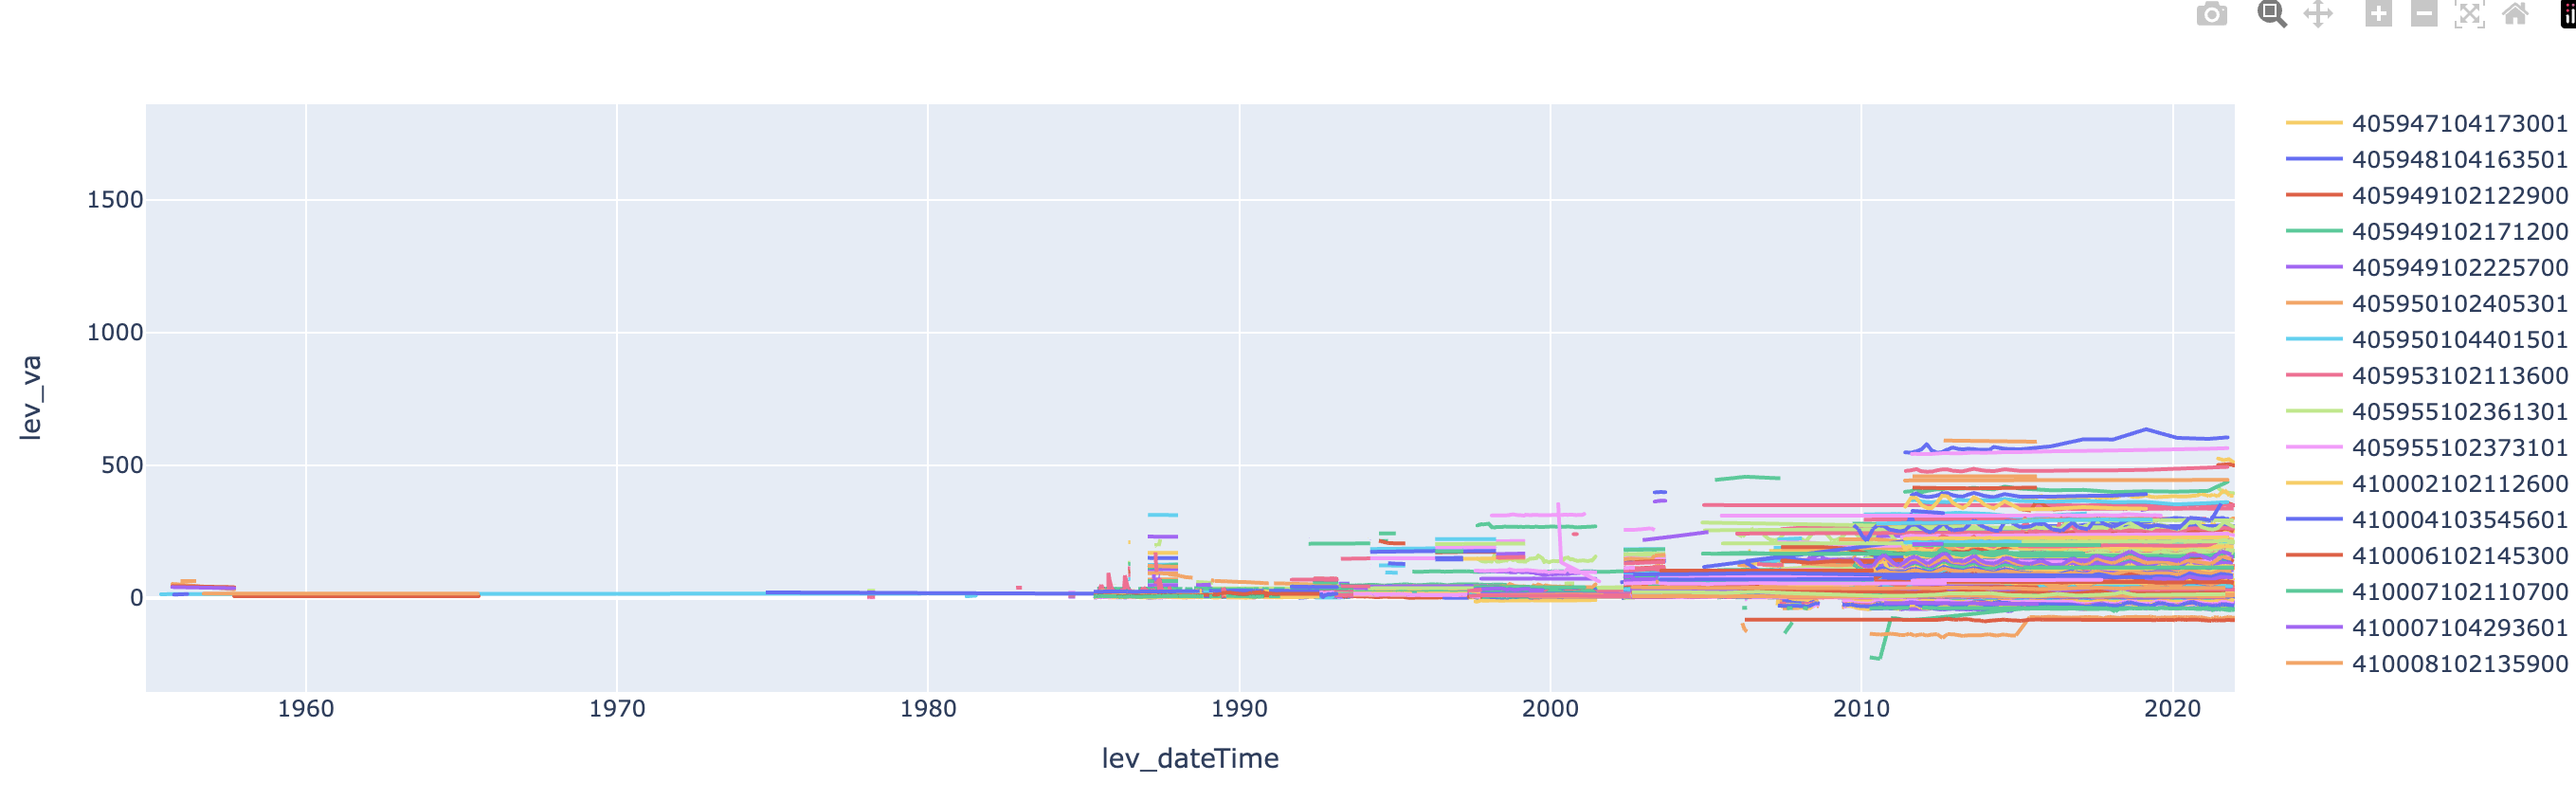

In [283]:
import plotly.express as px
import pandas as pd

# Create the line chart figure with Plotly Express
line_fig = px.line(df, x='lev_dateTime', y='lev_va', color='station_nm', hover_data=['station_nm'])

# Load your drought data into a DataFrame
df_drought = pd.read_csv('USDM-colorado.csv')
df_drought['Date'] = pd.to_datetime(df_drought['Date'])
df_drought.sort_values('Date', inplace=True)

# Define colors for the heatmap with lower opacity
heat_colors_opacity = ['rgba(100, 18, 13, 0.3)', 'rgba(209, 47, 39, 0.3)',
                       'rgba(243, 174, 72, 0.3)', 'rgba(245, 213, 139, 0.3)',
                       'rgba(255, 255, 99, 0.3)']

# Use the line chart figure as the base
fig = line_fig

# Add a secondary y-axis for the heatmap on the right side of the plot
fig.update_layout(
    yaxis2=dict(
        title='Drought Level Area',
        overlaying='y',
        side='right',
        showgrid=False,
        range=[0, 100],
        ticksuffix='%'
    ),
    legend=dict(
        x=1.10,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=200)  # Increase right margin to fit the legend
)

# Add heatmap traces to the figure as a subtle overlay
for i, level in enumerate(['D4', 'D3', 'D2', 'D1', 'D0']):
    fig.add_trace(go.Scatter(
        x=df_drought[df_drought['Drought Level'] == level]['Date'],
        y=df_drought[df_drought['Drought Level'] == level]['Area'],
        hoverinfo='x+y',
        mode='none',
        fill='tonexty',
        fillcolor=heat_colors_opacity[i],
        yaxis='y2',  # Assign to the secondary y-axis
        name=level
    ))

# Update layout with the title and axes labels
fig.update_layout(
    title="Water Level Over Time with Drought Severity Overlay",
    xaxis_title='Date',
    yaxis_title='Water Level',
    hovermode="x unified"
)

# Show the final combined figure
fig.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

need to examine groundwater usage next

In [374]:
%%R -o df -o site_info
# install.packages("dataRetrieval")
library(dataRetrieval)
# https://doi-usgs.github.io/dataRetrieval/

siteNumber <- c("393902103554001", "390740103055801", "382323104200701")  # Front range wells CO
ChoptankInfo <- readNWISsite(siteNumber)
parameterCd <- "72019"

# Raw daily data:
df <- readNWISuse(
  siteNumber =siteNumber,
  parameterCd = parameterCd,
  startDate="", 
  endDate="2022-01-01",
  tz="America/Denver"
)

site_info <- attributes(df)$siteInfo

Error in readNWISuse(siteNumber = siteNumber, parameterCd = parameterCd,  : 
  unused arguments (siteNumber = siteNumber, parameterCd = parameterCd, startDate = "", endDate = "2022-01-01", tz = "America/Denver")


RInterpreterError: Failed to parse and evaluate line '# install.packages("dataRetrieval")\nlibrary(dataRetrieval)\n# https://doi-usgs.github.io/dataRetrieval/\n\nsiteNumber <- c("393902103554001", "390740103055801", "382323104200701")  # Front range wells CO\nChoptankInfo <- readNWISsite(siteNumber)\nparameterCd <- "72019"\n\n# Raw daily data:\ndf <- readNWISuse(\n  siteNumber =siteNumber,\n  parameterCd = parameterCd,\n  startDate="", \n  endDate="2022-01-01",\n  tz="America/Denver"\n)\n\nsite_info <- attributes(df)$siteInfo\n'.
R error message: 'Error in readNWISuse(siteNumber = siteNumber, parameterCd = parameterCd,  : \n  unused arguments (siteNumber = siteNumber, parameterCd = parameterCd, startDate = "", endDate = "2022-01-01", tz = "America/Denver")'

## 2.6. Overall

Overall, I think we can get some good groundwater data.
- Sometimes data as far back as 1980s
- 28k sites that have some form of GW data
- For fun, plotted drought severity against 3 GW sites. Is there a lagged reaction of drought to GW usage?

        - Precipitation (P)
        - Temperature (T)
        - Groundwater Level (H)
        - and water withdrawal from resources (q)

# NA-CORDEX

https://na-cordex.org/simulations.html

https://na-cordex.org/simulations-modeling-group.html

In [13]:
import requests
import pandas as pd
# https://ncar-na-cordex.s3-us-west-2.amazonaws.com/catalogs/aws-na-cordex.json

na_cordex = requests.get('https://ncar-na-cordex.s3-us-west-2.amazonaws.com/catalogs/aws-na-cordex.json').json()

cordex_catalog = pd.read_csv(na_cordex['catalog_file'])

display(cordex_catalog.head())

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)>